In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Multivariate Linear Regression with Gradient Descent algorithm implementation

In [3]:
# implement functions

def computeCostFunction(X, y, theta):
    each_value = np.power(((X * theta.T) - y), 2)
    return sum(each_value) / (2 * len(X))

def gradient_Descent(X, y, theta, alpha, epochs):
    temp = np.matrix(np.zeros(theta.shape))
    parameters =int(theta.ravel().shape[1])
    cost = np.zeros(epochs)

    for i in range(epochs):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] -  (alpha/(len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCostFunction(X, y, theta)

    return theta, cost

In [4]:
# load data

data_ex2 = pd.read_csv("ex1data2.txt", names=['Size', 'Bedrooms', 'Price'])

In [5]:
# Normalize matrix so that data could lie in range (-1, 1)
data_ex2 = (data_ex2 - data_ex2.mean()) / data_ex2.std()
data_ex2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
# add column with ones in data
data_ex2.insert(0, "Ones", 1)

In [7]:
# define variables
cols = data_ex2.shape[1]
X = data_ex2.iloc[:, 0:cols-1]
y = data_ex2.iloc[:, cols-1:cols]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0, 0]))


In [8]:
# call defined functions
gd_theta, cost2 = gradient_Descent(X, y, theta, 0.08, 20)
print(f'slope values after optimization: {gd_theta} \nCost values after optimization:\n{cost2}')

slope values after optimization: [[-1.10738841e-16  6.21450024e-01  1.48705507e-01]] 
Cost values after optimization:
[0.42240494 0.36976889 0.32823909 0.29533361 0.26913536 0.24816282
 0.23127044 0.21757183 0.20638053 0.19716445 0.18951061 0.18309803
 0.17767684 0.17305212 0.16907145 0.16561532 0.16258975 0.15992048
 0.15754868 0.15542742]


In [9]:
print('Cost function: ')
computeCostFunction(X, y, theta)

Cost function: 


matrix([[0.4893617]])

Text(0.5, 1.0, 'Error vs. Training Epoch')

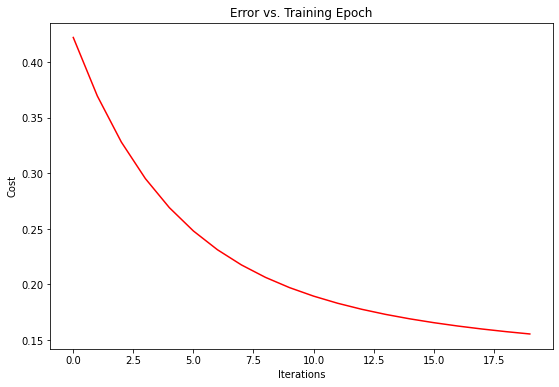

In [10]:
# plot cost function
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(20), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')


One more way of implementation Gradient Descent for Multivariate Linear Regression, step by step
y = b0 + b1X1 + b2 * X2 + ... + bnXn

In [11]:
# Implement functions in details

# step1
def initialize_parameters(slopes_len):
    slope = np.random.randn(slopes_len)   # lenght of features
    intercept = 0

    return slope, intercept


# step2
def forward_prop(X, slope, intercept):      # w--> 1xn, X-->nxm, yhat-->1xm, b-->[b b b.....n] vectors
    yhat = np.dot(slope, X) + intercept
    return yhat


# step3: Cost function
def cost_function(yhat, y):
    m = y.shape[1]
    J_cost = (1/(2 *m)) * np.sum(np.square(yhat - y))

    return J_cost


# step4: Count derivatives of slope and intercept values
def derivatives(X, y, yhat):
    m = y.shape[1]
    delta_yhat = (1/m) * (yhat - y)
    delta_slope = delta_yhat.dot(X.T)         # 1xm * mxn = 1xn  shape
    delta_intercept = np.sum(delta_yhat)

    return delta_slope, delta_intercept


# step 5: Update slope and intercept values

def update_GD(slope, intercept, delta_slope, delta_intercept, learning_rate):
    slope = slope - learning_rate * delta_slope
    intercept = intercept - learning_rate * delta_intercept

    return slope, intercept


# step 6: Creating model

def multilinearRegression(x_train, y_train, x_test, y_test, learning_rate, epochs):
    slopes_len = x_train.shape[0]
    slope, intercept = initialize_parameters(slopes_len)         # step 1

    costs_train = []
    m_train =  y_train.shape[1]
    m_test =  y_test.shape[1]

    for i in range(1, epochs+1):
        yhat_train = forward_prop(x_train, slope, intercept)     # step 2
        cost_train = cost_function(yhat_train, y_train)          # step 3
        costs_train.append(cost_train)
        delta_slope, delta_intercept = derivatives(x_train, y_train, yhat_train)   # step 4
        slope, intercept = update_GD(slope, intercept, delta_slope, delta_intercept, learning_rate)   # step 5


        # MSE_train
        MAE_train = (1/m_train)* np.sum(np.abs(yhat_train - y_train))

        # Cost_set, # MSE_set
        yhat_test = forward_prop(x_test, slope, intercept)
        cost_test = cost_function(yhat_test, y_test)
        MAE_test = (1/m_test)* np.sum(np.abs(yhat_test - y_test))


        print(f'epoch: {i}')
        print(f'Train cost: {cost_train} |  Test cost: {cost_test}')
        print(f'Train MAE: {MAE_train} |  Test MAE: {MAE_test}')


    plt.plot(costs_train)
    plt.xlabel('Iterations')
    plt.ylabel('Training cost')
    plt.title(f'learning rate - {learning_rate}')
    plt.show()

In [17]:
# load data from sklearn

from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
# Normalize matrix so that data could lie in range (-1, 1) and set variables
X = (data - data.mean()) / (data.max() - data.mean())
X.describe()
X.head()

y = boston['target']

In [20]:
# split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [21]:
# our model needs X_train has [features : samples] dimension
X_train.shape   # --> is samples x features dimension(339, 13)
X_train = X_train.T   #--> (13, 339)
y_train = np.array([y_train]) #--> (1, 339) [1 : samples] dimension


In [22]:
# similarly for test set
X_test = X_test.T  # (13, 167)
y_test = np.array([y_test])   # (1, 167)

epoch: 1
Train cost: 291.66971951290395 |  Test cost: 113.26095219502363
Train MAE: 22.53958551565794 |  Test MAE: 9.245672398706713
epoch: 2
Train cost: 87.82049417573634 |  Test cost: 674.7685490350381
Train MAE: 8.09961093173995 |  Test MAE: 23.388763260346177
epoch: 3
Train cost: 545.9648216753524 |  Test cost: 6107.991624157809
Train MAE: 20.87351694455619 |  Test MAE: 68.0199362945336
epoch: 4
Train cost: 4977.9573774214705 |  Test cost: 57556.72024157268
Train MAE: 61.72284043108453 |  Test MAE: 208.88609577338232
epoch: 5
Train cost: 46817.70954515509 |  Test cost: 542535.6033674541
Train MAE: 188.7396253484647 |  Test MAE: 640.4411653738326
epoch: 6
Train cost: 441649.0134249704 |  Test cost: 5120401.584198759
Train MAE: 580.0650219266979 |  Test MAE: 1967.311807173397
epoch: 7
Train cost: 4167486.080529542 |  Test cost: 48316612.9232931
Train MAE: 1781.1077880153277 |  Test MAE: 6043.346542463601
epoch: 8
Train cost: 39326388.8860796 |  Test cost: 455942556.99837893
Train MAE

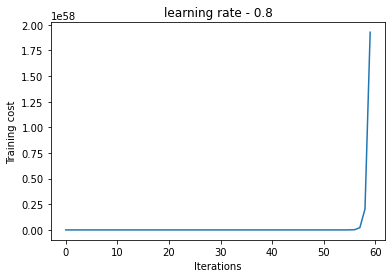

In [26]:
# Feed list parameters to our created model
lin_reg = multilinearRegression(X_train, y_train, X_test, y_test, 0.8, 60)

In [27]:
# compare with sklearn model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
model = lin_model.fit(X_train.T, y_train.T)
predictions = model.predict(X_test.T)

In [28]:
model_MAE = (1/y_test.shape[1]) * np.sum(np.abs(predictions - y_test.T))
model_MAE

3.455034932248354